Example of the process of doing DEMs for all orbits for a given observation of an AR – where we don't window out any intervals because of shifts, etc. Instead, we will save energy-specific information about the percent of NuSTAR emission in the chosen region as a function of time, for later inspection. This will help identify cases where pointing shifts might cause unphysical distortion to the DEM inputs. 

Note: auto-download of an AIA file (for use in the initial co-alignmnet) will break while the JSOC is still down. We will add a thing where you can point to an existing AIA file instead.

Overview:

- Define orbits
- Run time interval selection
- Examine resulting intervals
- Manually establish a co-alignment shift between NuSTAR and AIA
- Automatically find co-alignment shifts + make regions for all other time intervals (note: this relies on the assumption that the COM is a good representation of the location of the brightest source, i.e. that the NuSTAR data is primarially one blob).
- Save AIA region files for NCCS input
- NOT IN THIS NOTEBOOK: YOU THEN TAKE THOSE AND MAKE AIA INPUTS ON THE NCCS
- Conduct AIA/NuSTAR DEMs as a function of time, given all the above
- Plot results.
- Print some stats about "left out" times.

In [1]:
# import matplotlib.pyplot as plt
# import numpy as np
# import glob
# from astropy.io import fits
# from astropy import units as u
# import importlib
# import pathlib

#Path to top-level do-dem directory - edit for your system.
path_to_dodem = '/Users/jmdunca2/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')

# #import nustar_dem_prep as nu
import initial_analysis as ia
# import orbit_auto as oa
import time_interval_selection as tis
import nustar_utilities as nuutil
import gauss2D as g2d


# import os
# # For macOS
# def play_sound():
#     os.system("afplay /System/Library/Sounds/Glass.aiff")

import pickle
import pathlib


In [2]:
key = '29-apr-21_1'

In [3]:
with open('all_targets.pickle', 'rb') as f:
    data = pickle.load(f)

ARDict = data[key]

id_dirs = ARDict['datapaths']
obsids = ARDict['obsids']
working_dir = ARDict['working_dir']

#Make a new working directory for prepped data/etc if it doesn't yet exist
save_path = pathlib.Path(working_dir)
if not save_path.exists():
    save_path.mkdir()

In [4]:
ARDict

{'NOAA_ARID': ['AR12818', 'AR12820', 'AR12821'],
 'datapaths': ['/Users/jmdunca2/nustar/apr-2021/20615001001/',
  '/Users/jmdunca2/nustar/apr-2021/20615002001/',
  '/Users/jmdunca2/nustar/apr-2021/20615003001/',
  '/Users/jmdunca2/nustar/apr-2021/20615004001/',
  '/Users/jmdunca2/nustar/apr-2021/20615005001/'],
 'obsids': ['20615001001',
  '20615002001',
  '20615003001',
  '20615004001',
  '20615005001'],
 'working_dir': '/Users/jmdunca2/do-dem/initial_dem_apr21_gauss/',
 'direction': 'single',
 'notes': 'Polito paper on NuSTAR/IRIS observation of non-thermal components in a flare.',
 'goes_satellite': 16,
 'orbit durations': [<Quantity 60.35 min>,
  <Quantity 60.36666667 min>,
  <Quantity 60.36666667 min>,
  <Quantity 60.36666667 min>,
  <Quantity 56.43333333 min>],
 'total duration': <Quantity 297.88333333 min>,
 'total livetime': <Quantity 3.57511088 min>}

In [5]:
for id in id_dirs:
    evt_data, hdr = ia.return_submap(datapath=id, fpm='A', return_evt_hdr=True)
    time0, time1 = [nuutil.convert_nustar_time(hdr['TSTART']), nuutil.convert_nustar_time(hdr['TSTOP'])]
    timerange = [time0, time1]
    print(timerange[0].strftime('%H-%M-%S'), timerange[1].strftime('%H-%M-%S'))

14-53-42 15-54-03
16-30-20 17-30-42
18-06-58 19-07-20
19-43-36 20-43-58
21-20-14 22-16-40


Percent of data in region:  0.7302985043778684
Percent of data in region:  0.6945017760393236
Percent of data in region:  0.8115732226108184
Percent of data in region:  0.7837120350699559
Percent of data in region:  0.829692882129522
Percent of data in region:  0.8086826261751472
Percent of data in region:  0.8661612912702698
Percent of data in region:  0.8508579637196891
Percent of data in region:  0.8557876162623576
Percent of data in region:  0.8395064944537938


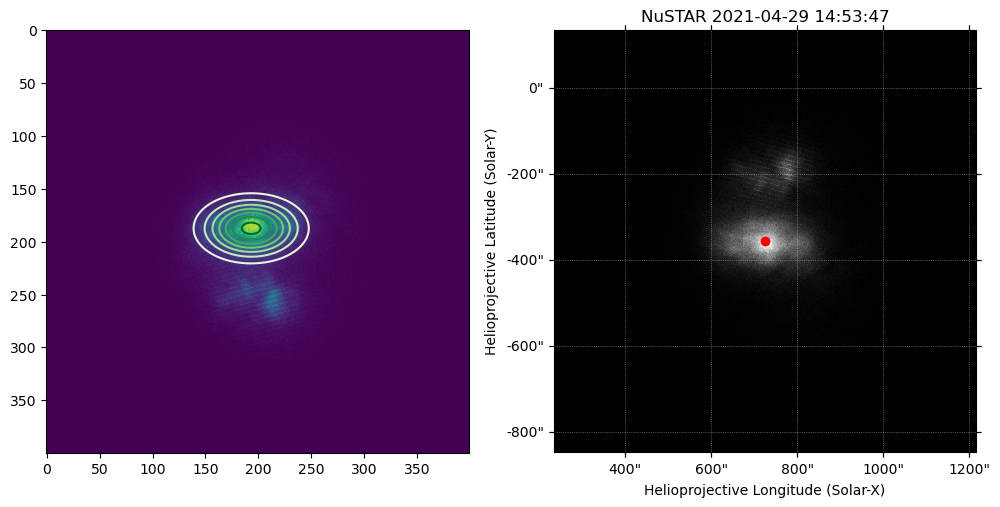

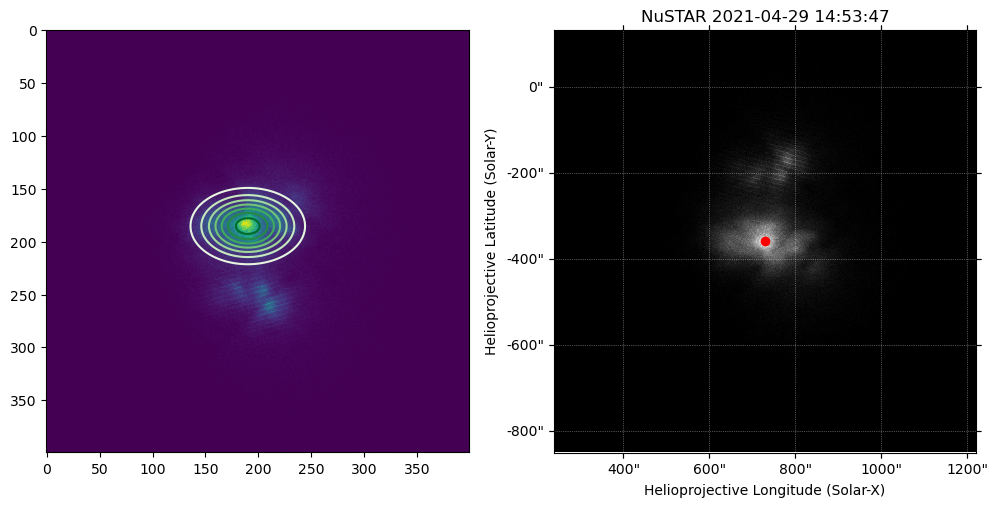

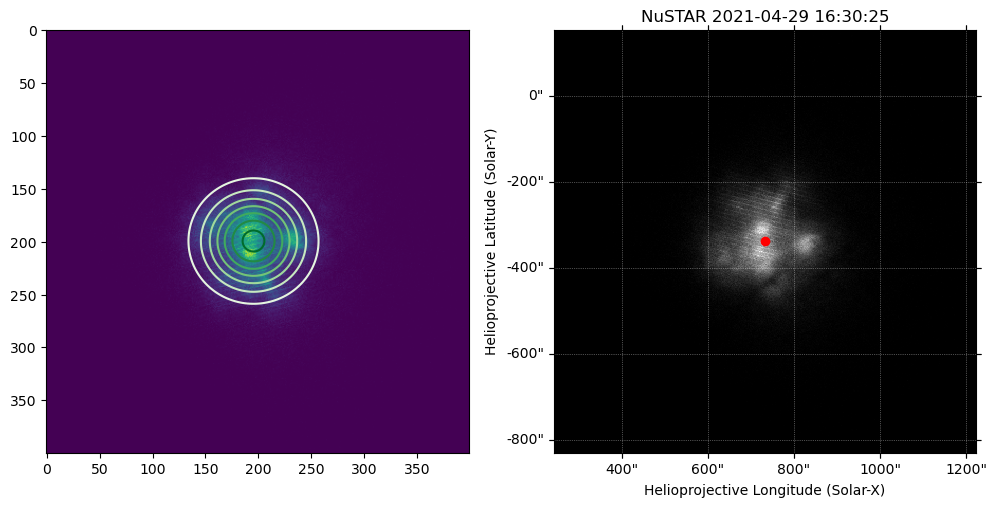

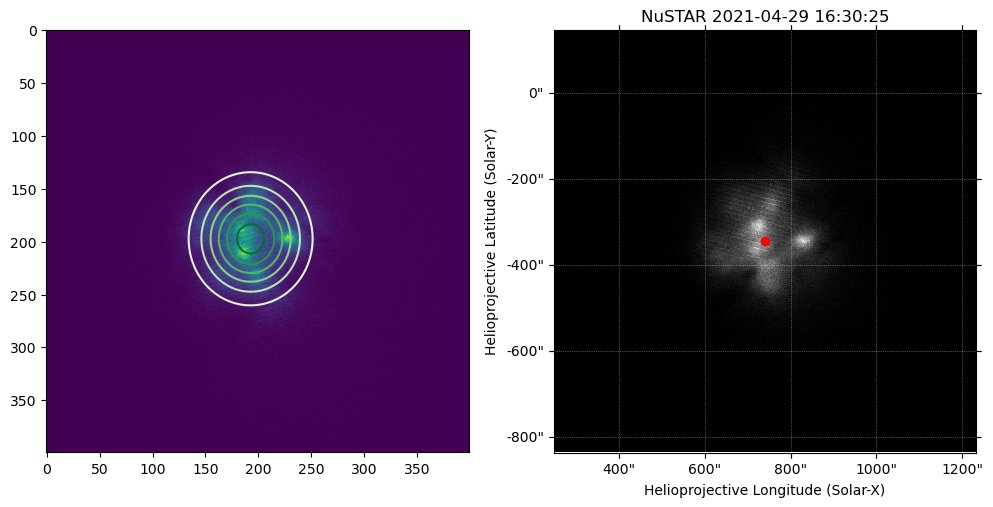

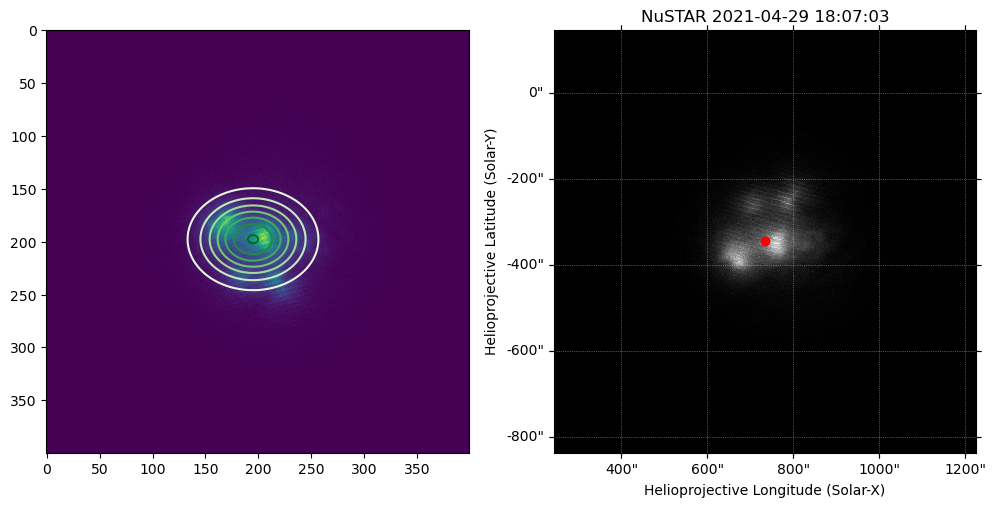

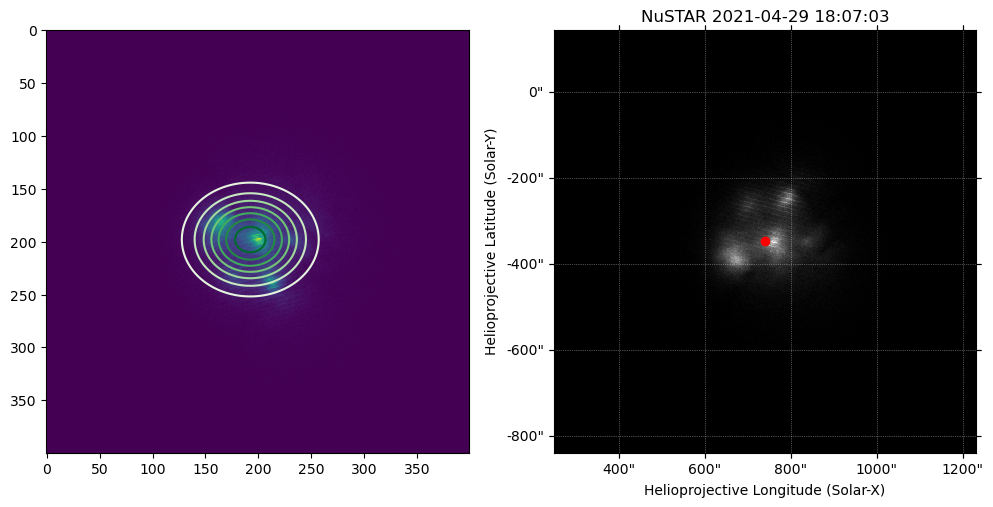

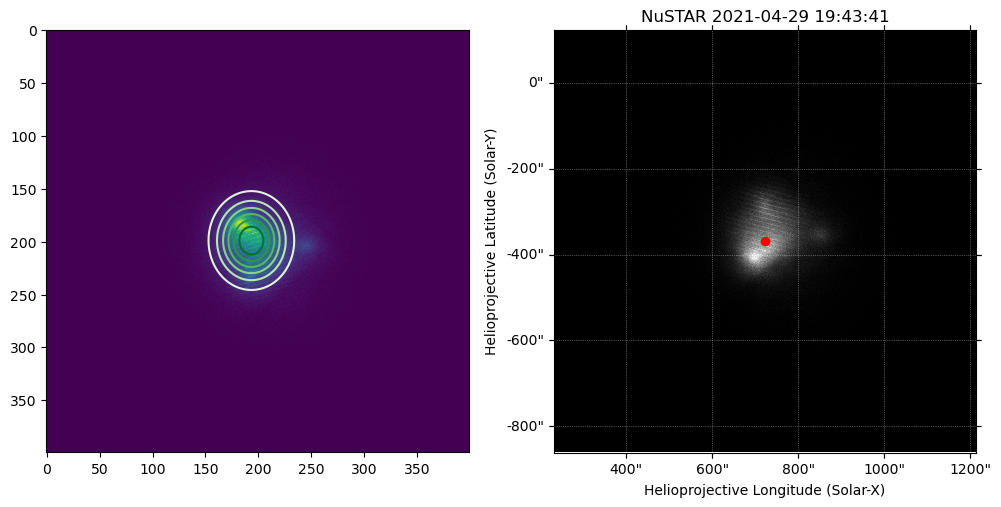

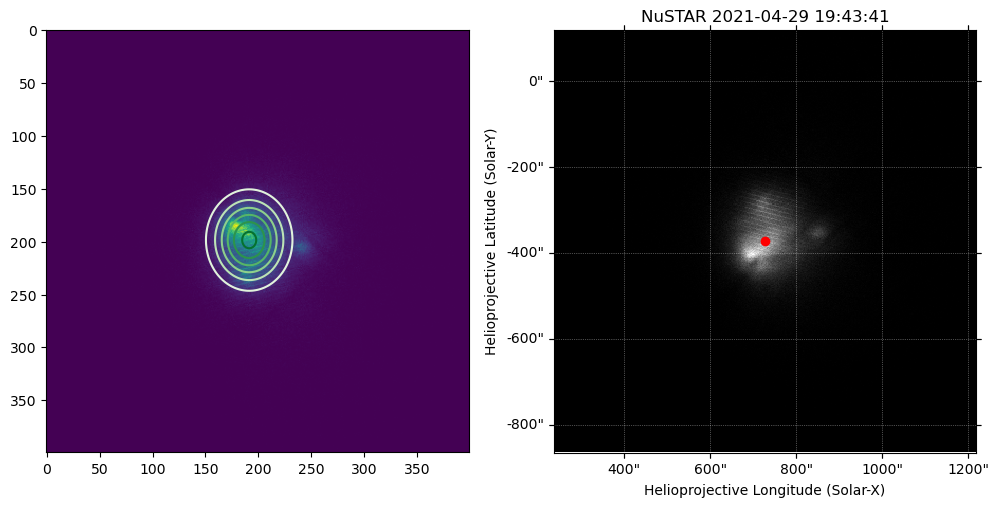

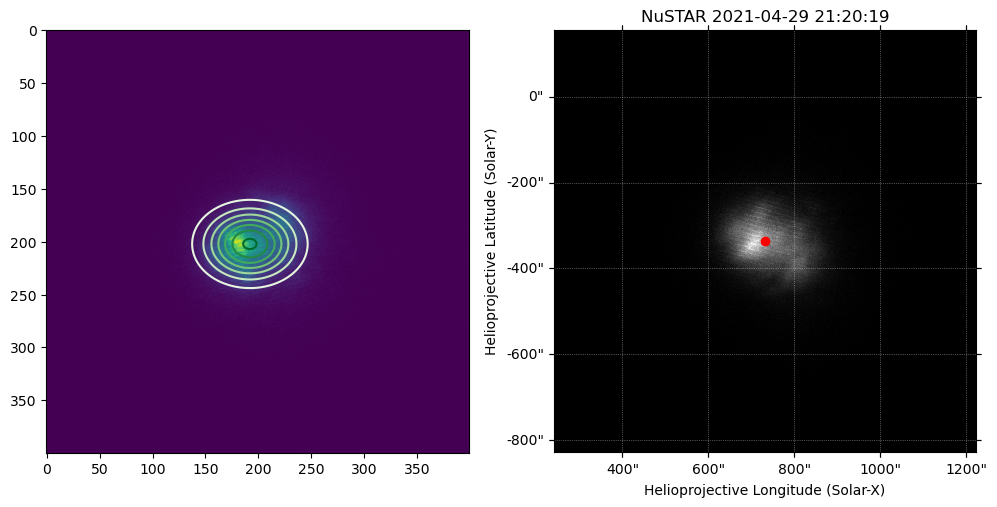

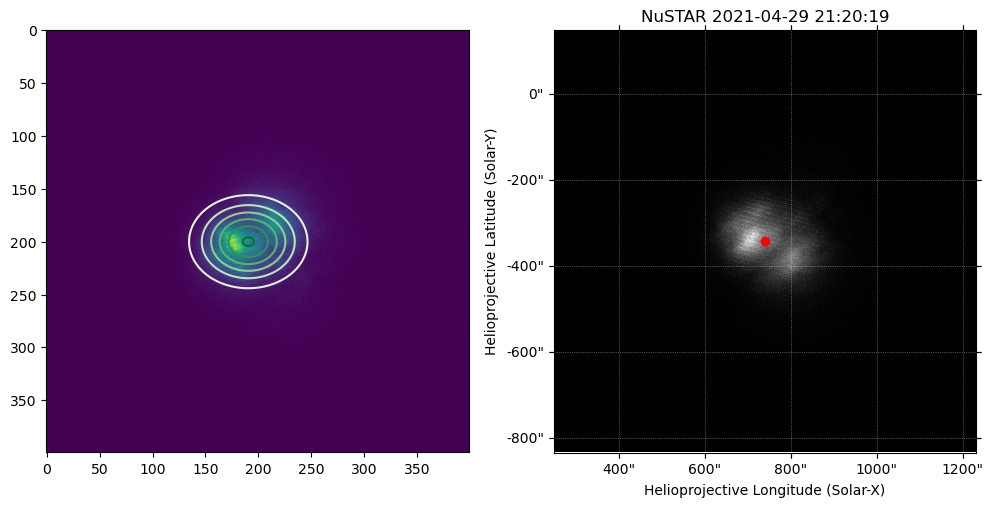

In [6]:
#importlib.reload(g2d)
gauss_stats=[]
for i in range(0, len(id_dirs)):
    #guess, fast_min_factor 
    res = g2d.per_orbit_onegauss_params(id_dirs[i], guess=[], plot=True)
    gauss_stats.append(res)


In [7]:
ARDict['gauss_stats'] = gauss_stats

data[key] = ARDict

with open('all_targets.pickle', 'wb') as f:
         # Pickle the 'data' dictionary using the highest protocol available.
         pickle.dump(data, f, pickle.HIGHEST_PROTOCOL) 